In [ ]:
pip install netCDF4 numpy matplotlib

In [1]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Load the Dataset (lazy) and print the root metadata.
ds = Dataset("/nas/cee-water/cjgleason/UAT_tests/UAT 2/oc_sword_v16_SOS_results.nc")
print(ds)

<class 'netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    title: SWOT discharge prior information and processing outputs
    summary: All of the outputs from all processes used to generate SWOT discharge products.
    keywords: GCMD:Rivers/Streams, GCMD:Discharge/Flow, GCMD:SWOT
    keywords_vocabulary: NASA Global Change Master Directory (GCMD) Science Keywords
    doi: 10.5067/SWOT-SOS-V1
    id: SWOT_L4_DAWG_SOS_DISCHARGE
    naming_authority: gov.nasa
    standard_name_vocabulary: CF Standard Name Table v72
    featureType: timeseries
    platform: SWOT
    platform_vocabulary: GCMD platform keywords
    instrument: KaRIn
    instrument_vocabulary: GCMD instrument keywords
    processing_level: L4
    conventions: CF-1.8, ACDD-1.3
    acknowledgement: NASA AIST Program Grant Number 80NSSC22K1487, NASA SWOT Science Team Grant Numbers: 80NSSC20K1143, 80NSSC20K1141, 80NSSC20K1340 and CNES SWOT TOSCA fund for the SWOT DAHM project. Additional support from PO.DAAC

In [3]:
# Let's first look at the consensus group.
ds.groups['consensus']

<class 'netCDF4.Group'>
group /consensus:
    dimensions(sizes): 
    variables(dimensions): float64 consensus_q(num_reaches), int32 time_int(num_reaches)
    groups: 

In [4]:
# Now look into the consensus_q variable
ds['consensus']['consensus_q']

<class 'netCDF4.Variable'>
vlen consensus_q(num_reaches)
    long_name: consensus_discharge
    valid_max: 10000000
    short_name: consensus
    tag_basic_expert: Basic
    coverage_content_type: modelResult
    missing_value: -999999999999.0
    comment: Discharge from the consensus discharge algorithm.
    fill: -99999999
    units: m^3/s
    valid_min: 0
vlen data type: float64
path = /consensus
unlimited dimensions: 
current shape = (14453,)

In [5]:
# To see the values, you actually need to index/slice the variable.
# This loads the data into memory.
ds['consensus']['consensus_q'][:]

array([array([-1.e+12]), array([-1.e+12]), array([-1.e+12]), ...,
       array([-1.e+12]), array([-1.e+12]), array([-1.e+12])],
      shape=(14453,), dtype=object)

In [6]:
# Now let's look at the reaches group.
ds.groups['reaches']

<class 'netCDF4.Group'>
group /reaches:
    dimensions(sizes): 
    variables(dimensions): int64 reach_id(num_reaches), float64 x(num_reaches), float64 y(num_reaches), <class 'str'> river_name(num_reaches), <class 'str'> observations(num_reaches), float64 time(num_reaches)
    groups: 

In [7]:
# Inspect the metadata for the reach_id variable
ds['reaches']['reach_id']

<class 'netCDF4.Variable'>
int64 reach_id(num_reaches)
    format: CBBBBBRRRRT
    comment: Taken from SWORD PDD: id of each reach. The format of none the id is as follows: CBBBBBRRRRT where C = Continent (the first number of the Pfafstetter basin code), B = Remaining Pfafstetter basin codes up to level 6, R = Reach id (assigned sequentially within a level 6 basin starting at the downstream end working upstream, T = Type (1 – river, 3 – lake on river, 4 – dam or waterfall, 5 – unreliable topology, 6 – ghost reach)
    valid_min: -998
    valid_max: 1000000000000000000
    coverage_content_type: referenceInformation
    long_name: reach_identifier
path = /reaches
unlimited dimensions: 
current shape = (14453,)
filling on, default _FillValue of -9223372036854775806 used

In [8]:
# And again slice the variable to see its values.
ds['reaches']['reach_id'][:]

masked_array(data=[51111100013, 51111100021, 51111100031, ...,
                   57205800071, 57205800086, 57205800096],
             mask=False,
       fill_value=999999)

In [9]:
# Pick a reach of interest. Here, I'm copying the reach from the R example
reach_id = 56327000111

# Get a list of all reach_ids in the reaches group, then find the index of our reach
all_reach_ids = ds['reaches']['reach_id'][:]
reach_index = np.where(all_reach_ids == reach_id)[0][0]

reach_index

np.int64(11792)

In [10]:
discharge = ds['consensus']['consensus_q'][reach_index]
print(f"{discharge = }")

discharge = array([ 4.55350153e+01, -1.00000000e+12,  2.33193722e+01, -1.00000000e+12,
        2.78548563e+01,  2.99614860e+01, -1.00000000e+12,  3.93056235e+01,
       -1.00000000e+12, -1.00000000e+12,  1.11539393e+02,  1.47240194e+02,
       -1.00000000e+12, -1.00000000e+12,  8.81922042e+01, -1.00000000e+12,
        5.21887771e+02,  5.59120807e+02, -1.00000000e+12,  1.55319485e+02,
        4.43802010e+02, -1.00000000e+12,  1.98135249e+02, -1.00000000e+12,
       -1.00000000e+12,  4.41150806e+02, -1.00000000e+12, -1.00000000e+12,
        1.11131643e+02, -1.00000000e+12, -1.00000000e+12,  8.98144785e+01,
       -1.00000000e+12,  9.44369819e+01, -1.00000000e+12, -1.00000000e+12,
        7.69619066e+01,  6.88037412e+01, -1.00000000e+12,  8.43577476e+01,
        7.07040761e+01, -1.00000000e+12,  6.28881165e+01, -1.00000000e+12,
        5.58800738e+01, -1.00000000e+12, -1.00000000e+12,  7.28484384e+01,
        3.81689350e+01,  4.55280680e+01, -1.00000000e+12,  5.35663016e+01,
       -1.000

In [11]:
mask = discharge != ds['consensus']['consensus_q'].missing_value
discharge = discharge[mask]
print(f"{discharge = }")

discharge = array([ 45.53501532,  23.31937223,  27.85485634,  29.96148605,
        39.30562348, 111.53939295, 147.24019401,  88.19220421,
       521.88777084, 559.12080737, 155.31948537, 443.80201024,
       198.13524944, 441.15080621, 111.1316431 ,  89.81447852,
        94.43698195,  76.96190661,  68.80374122,  84.35774757,
        70.70407613,  62.88811646,  55.88007377,  72.84843835,
        38.16893499,  45.52806796,  53.56630156,  35.59055606,
       274.85822537, 231.17062238, 131.67522677, 457.71417746,
       171.33561723, 193.62546148, 283.24128003, 457.71417746,
       424.50759014, 245.94836119, 115.80163725])


In [12]:
time_s = ds['consensus']['time_int'][reach_index]
time_s = time_s[mask]
print(f"{time_s = }")

time_s = array([744102087, 749510201, 750667094, 751312906, 752469799, 754272505,
       754918316, 757877915, 759680621, 760326432, 761483325, 762129137,
       763286029, 765088733, 766891439, 769339954, 770496848, 772299552,
       772945363, 774102256, 774748068, 776550773, 777707664, 780156184,
       781313079, 781958889, 783115783, 784918486, 787367003, 790326600,
       790972412, 792775115, 793932010, 794577820, 795734714, 796380525,
       797537418, 798183230, 799340123], dtype=int32)


In [13]:
ds['consensus']['time_int']

<class 'netCDF4.Variable'>
vlen time_int(num_reaches)
    long_name: integer time for consensus Q - seconds since beginning of January 1, 2000
    calendar: gregorian
    short_name: time_int
    standard_name: time (seconds)
    tag_basic_expert: Basic
    missing_value: -999999999999
    comment: seconds since beginning of January 1, 2000
    fill: -999999999999
vlen data type: int32
path = /consensus
unlimited dimensions: 
current shape = (14453,)

In [14]:
epoch = np.datetime64('2000-01-01')
datetime = epoch + time_s.astype('timedelta64[s]')
print(f"{datetime = }")

datetime = array(['2023-07-31T07:01:27', '2023-10-01T21:16:41',
       '2023-10-15T06:38:14', '2023-10-22T18:01:46',
       '2023-11-05T03:23:19', '2023-11-26T00:08:25',
       '2023-12-03T11:31:56', '2024-01-06T17:38:35',
       '2024-01-27T14:23:41', '2024-02-04T01:47:12',
       '2024-02-17T11:08:45', '2024-02-24T22:32:17',
       '2024-03-09T07:53:49', '2024-03-30T04:38:53',
       '2024-04-20T01:23:59', '2024-05-18T09:32:34',
       '2024-05-31T18:54:08', '2024-06-21T15:39:12',
       '2024-06-29T03:02:43', '2024-07-12T12:24:16',
       '2024-07-19T23:47:48', '2024-08-09T20:32:53',
       '2024-08-23T05:54:24', '2024-09-20T14:03:04',
       '2024-10-03T23:24:39', '2024-10-11T10:48:09',
       '2024-10-24T20:09:43', '2024-11-14T16:54:46',
       '2024-12-13T01:03:23', '2025-01-16T07:10:00',
       '2025-01-23T18:33:32', '2025-02-13T15:18:35',
       '2025-02-27T00:40:10', '2025-03-06T12:03:40',
       '2025-03-19T21:25:14', '2025-03-27T08:48:45',
       '2025-04-09T18:10:18', '2025

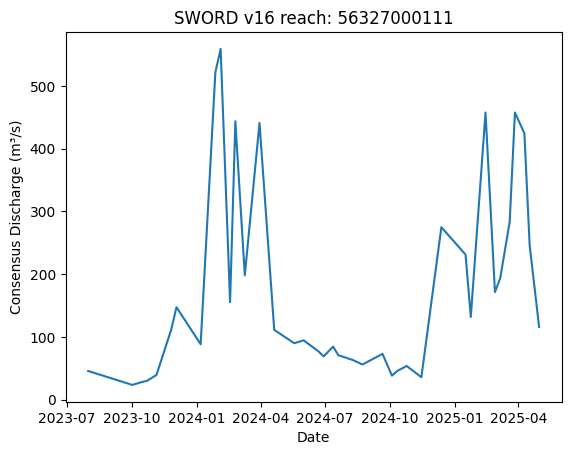

In [18]:
plt.plot(datetime, discharge)
plt.title(f"SWORD v16 reach: {reach_id}")
plt.ylabel("Consensus Discharge (m³/s)")
plt.xlabel("Date")
plt.show()